In [253]:
import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [254]:
%matplotlib inline

In [255]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [256]:
filePath_train_set = 'MNIST-Fashion-data/train-images-idx3-ubyte.gz'

In [257]:
filePath_train_label = 'MNIST-Fashion-data/train-labels-idx1-ubyte.gz'

In [258]:
filePath_test_set = 'MNIST-Fashion-data/t10k-images-idx3-ubyte.gz'

In [259]:
filePath_test_label = 'MNIST-Fashion-data/t10k-labels-idx1-ubyte.gz'

In [260]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-260-6a73da63f8ba>", line 1, in <module>
    with gzip.open(filePath_train_label, 'rb') as trainLbpath:
  File "/anaconda3/lib/python3.7/gzip.py", line 53, in open
    binary_file = GzipFile(filename, gz_mode, compresslevel)
  File "/anaconda3/lib/python3.7/gzip.py", line 163, in __init__
    fileobj = self.myfileobj = builtins.open(filename, mode or 'rb')
FileNotFoundError: [Errno 2] No such file or directory: 'MNIST-Fashion-data/train-labels-idx1-ubyte.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2018, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST-Fashion-data/train-labels-idx1-ubyte.gz'

In [261]:
X_train = trainSet
X_test = testSet
y_train = trainLabel
y_test = testLabel

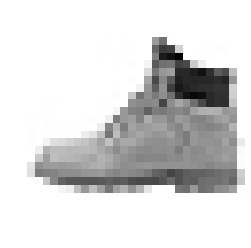

In [279]:
showImage(X_train[90])

In [280]:
y_train[90]

9

In [248]:
y_train[0]

9

In [249]:
X_test.shape

(10000, 784)

In [250]:
 np.random.seed(42)

In [ ]:
shuffle_index = np.random.permutation(60000)

In [ ]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
showImage(X_train[1])

In [ ]:
X_train[1].shape

In [ ]:
X_train[1]

In [ ]:
y_train[1]

In [ ]:
y_train.shape

In [ ]:
scaler = StandardScaler()

In [ ]:
 X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
X_train_scaled[10]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train_scaled, y_train)

In [ ]:
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0] 

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = sgd_clf.predict(X_train_scaled)

In [ ]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
sgd_class_report = classification_report(y_train, y_train_predict)

In [ ]:
print ("Accuracy is :: " , sgd_accuracy)
print ("Precision is :: " , sgd_precision)
print ("Recall is :: " , sgd_recall)
print ("F1_score :: " , sgd_f1_score)


In [ ]:
print ("SGDClassifier Classification Report :: " , sgd_class_report)

In [ ]:
#Training Model using Softmax Regression (multi-class classification problem)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,random_state=42)

In [ ]:
log_clf.fit(X_train_scaled, y_train)

In [ ]:
y_train[0] 


In [ ]:
y_train_predict[0]


In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = log_clf.predict(X_train_scaled)

In [ ]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')
log_report = classification_report(y_train, y_train_predict)

In [ ]:
print ("------------Different score for LogisticRegression")
print ("Accuracy is :: " , log_accuracy)
print ("Precision is :: " , log_precision)
print ("Recall is :: " , log_recall)
print ("F1_score :: " , log_f1_score)

------------Different score for LogisticRegression
Accuracy is ::  0.9653
Precision is ::  0.9653631441482463
Recall is ::  0.9653
F1_score ::  0.9651755214917088


In [ ]:
print ("LogisticRegression Classification Report :: " , log_report)

LogisticRegression Classification Report ::                precision    recall  f1-score   support

           0       0.94      0.96      0.95      6000
           1       1.00      0.99      0.99      6000
           2       0.94      0.94      0.94      6000
           3       0.96      0.98      0.97      6000
           4       0.93      0.96      0.94      6000
           5       0.99      0.98      0.99      6000
           6       0.95      0.88      0.91      6000
           7       0.97      0.98      0.98      6000
           8       0.99      0.99      0.99      6000
           9       0.99      0.98      0.99      6000

   micro avg       0.97      0.97      0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [ ]:
#Training the model using DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)

In [ ]:
## Scaling is not needed for Decision Tree algorithm , hence X_train has been used
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
y_train_predict = dec_tree_clf.predict(X_train[1].reshape(1, -1))

In [ ]:
y_train[0]

8

In [ ]:
y_train_predict[0]

8

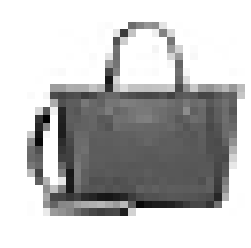

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = dec_tree_clf.predict(X_train)

In [ ]:
y_train_predict[1]

8

In [ ]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')
dec_tree_report = classification_report(y_train, y_train_predict)

In [ ]:
print ("------------Different score for DecisionTreeClassifier")
print ("Accuracy is :: " , dec_tree_accuracy)
print ("Precision is :: " , dec_tree_precision)
print ("Recall is :: " , dec_tree_recall)
print ("F1_score :: " , dec_tree_f1_score)

------------Different score for DecisionTreeClassifier
Accuracy is ::  1.0
Precision is ::  1.0
Recall is ::  1.0
F1_score ::  1.0


In [ ]:
print ("DecisionTreeClassifier Classification Report :: " , dec_tree_report)

DecisionTreeClassifier Classification Report ::                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

   micro avg       1.00      1.00      1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
##Training the model using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

In [ ]:
rnd_clf.fit(X_train, y_train)

In [ ]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = rnd_clf.predict(X_train)

In [ ]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
rnd_report = classification_report(y_train, y_train_predict)

In [ ]:
print ("------------Different score for RandomForestClassifier")
print ("Accuracy is :: " , rnd_accuracy)
print ("Precision is :: " , rnd_precision)
print ("Recall is :: " , rnd_recall)
print ("F1_score :: " , rnd_f1_score)



In [ ]:
print ("RandomForestClassifier Classification Report :: " , rnd_report)

In [ ]:
#Training the Model using VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,random_state=42)


In [ ]:
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)


In [ ]:
#Create an instance of VotingClassifier by passing following parameters - estimators
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)], voting='soft')

In [ ]:
#Train the model using Scaled training dataset 
voting_clf.fit(X_train_scaled, y_train)

In [ ]:
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = voting_clf.predict(X_train_scaled)

In [ ]:
voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')
voting_report = classification_report(y_train, y_train_predict)


In [ ]:
print ("------------Different score for VotingClassifier")
print ("Accuracy is :: " , voting_accuracy)
print ("Precision is :: " , voting_precision)
print ("Recall is :: " , voting_recall)
print ("F1_score :: " , voting_f1_score)

In [ ]:
print ("VotingClassifier Classification Report :: " , voting_report)

In [ ]:
#Cross-Validation - SGDClassifier

In [ ]:
def display_scores(scores):
    print ("The accuracy score", scores)
    print("The mean of scores = " , scores.mean())
    print("The Standard Daviation of scores = " , scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
sgd_cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(sgd_cv_scores)

In [ ]:
sgd_cv_accuracy = sgd_cv_scores.mean()

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [ ]:
sgd_cv_precision = precision_score(y_train,y_train_pred, average='weighted')
sgd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [ ]:
print ("------------Different score for Cross Validation of SGDClassifier")
print ("Score", display_scores(sgd_cv_scores))
print ("Accuracy", sgd_cv_accuracy)
print ("Precision is :: " , sgd_cv_precision)
print ("Recall is :: " , sgd_cv_recall)
print ("F1_score :: " , sgd_cv_f1_score)

In [ ]:
#Cross-Validation - Softmax Regression

In [ ]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_cv_scores)

In [ ]:
log_cv_accuracy = log_cv_scores.mean()

In [ ]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [ ]:
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')


In [ ]:
print ("------------Different score for Cross Validation of the Softmax Logistis Regression")
print ("Score is :: " , display_scores(log_cv_scores))
print ("Accuracy is :: " , log_cv_accuracy)
print ("Precision is :: " , log_cv_precision)
print ("Recall is :: " , log_cv_recall)
print ("F1_score :: " , log_cv_f1_score)

In [ ]:
#Cross-Validation - DecisionTreeClassifier

In [ ]:
dec_tree_cv_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3 , scoring="accuracy") 
display_scores(dec_tree_cv_scores)

In [ ]:
dec_tree_cv_accuracy = dec_tree_cv_scores.mean()

In [ ]:
y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
dec_tree_cv_precision = precision_score(y_train,y_train_pred, average='weighted')
dec_tree_cv_recall = recall_score(y_train, y_train_pred , average='weighted')
dec_tree_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [ ]:
print ("------------Different score for Cross Validation of the DecisionTreeClassifier")
print ("Score :: " , display_scores(dec_tree_cv_scores))
print ("Accuracy :: " , dec_tree_cv_accuracy)
print ("Precision is :: " , dec_tree_cv_precision)
print ("Recall is :: " , dec_tree_cv_recall)
print ("F1_score :: " , dec_tree_cv_f1_score)

In [ ]:
#Cross-Validation - RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

rnd_cv_scores = cross_val_score(rnd_clf,X_train,y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)

In [ ]:
rnd_cv_accuracy = rnd_cv_scores.mean()
print (rnd_cv_accuracy)

In [ ]:
y_train_pred = cross_val_predict(rnd_clf,X_train,y_train, cv=3)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')


In [ ]:
print ("------------Different score for Cross Validation of the RandomForestClassifier")
print ("Score is :: " , display_scores(rnd_cv_scores))
print ("Accuracy is :: " , rnd_cv_accuracy)
print ("Precision is :: " , rnd_cv_precision)
print ("Recall is :: " , rnd_cv_recall)
print ("F1_score :: " , rnd_cv_f1_score)


In [ ]:
#Cross-Validation - Ensemble (Voting Classifier)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42 )

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [ ]:
voting_cv_scores = cross_val_score(voting_clf, X_train_scaled,  y_train, cv=3, scoring="accuracy" ) 
display_scores(voting_cv_scores)

In [ ]:
voting_cv_accuracy = voting_cv_scores.mean()

In [ ]:
y_train_pred = cross_val_predict(voting_clf, X_train_scaled,  y_train, cv=3)

In [ ]:
voting_

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
voting_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
voting_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
voting_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [ ]:
print ("------------Different score for Cross Validation of the Ensemble (Voting Classifier)")
print ("Score is :: " , display_scores(voting_cv_scores))
print ("Accuracy is :: " , voting_cv_accuracy)
print ("Precision is :: " , voting_cv_precision)
print ("Recall is :: " , voting_cv_recall)
print ("F1_score :: " , voting_cv_f1_score)

In [ ]:
print ("------------Different score for Cross Validation of SGDClassifier")
display_scores(sgd_cv_scores)
print ("Accuracy :: ", sgd_cv_accuracy)
print ("Precision is :: " , sgd_cv_precision)
print ("Recall is :: " , sgd_cv_recall)
print ("F1_score :: " , sgd_cv_f1_score)

print ("------------Different score for Cross Validation of the Softmax Logistis Regression")
display_scores(log_cv_scores)
print ("Accuracy is :: " , log_cv_accuracy)
print ("Precision is :: " , log_cv_precision)
print ("Recall is :: " , log_cv_recall)
print ("F1_score :: " , log_cv_f1_score)

print ("------------Different score for Cross Validation of the DecisionTreeClassifier")
display_scores(dec_tree_cv_scores)
print ("Accuracy :: " , dec_tree_cv_accuracy)
print ("Precision is :: " , dec_tree_cv_precision)
print ("Recall is :: " , dec_tree_cv_recall)
print ("F1_score :: " , dec_tree_cv_f1_score)

print ("------------Different score for Cross Validation of the RandomForestClassifier")
display_scores(rnd_cv_scores)
print ("Accuracy is :: " , rnd_cv_accuracy)
print ("Precision is :: " , rnd_cv_precision)
print ("Recall is :: " , rnd_cv_recall)
print ("F1_score :: " , rnd_cv_f1_score)


print ("------------Different score for Cross Validation of the Ensemble (Voting Classifier)")
display_scores(voting_cv_scores)
print ("Accuracy is :: " , voting_cv_accuracy)
print ("Precision is :: " , voting_cv_precision)
print ("Recall is :: " , voting_cv_recall)
print ("F1_score :: " , voting_cv_f1_score)


#### Fine-Tuning the Model - Grid Search - Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.99 )

In [ ]:
X_train_reduced = pca.fit_transform(X_train)


In [ ]:
pca.n_components_

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
X_train_recovered = pca.inverse_transform(X_train_reduced)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

#### Grid Search - Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10,15],
    }]

In [ ]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)


In [ ]:
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)


In [ ]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [ ]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train_reduced, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test_reduced = pca.transform(X_test)

In [ ]:
y_test_predict = final_model.predict(X_test_reduced)

In [ ]:
final_accuracy = accuracy_score(y_test,y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test,y_test_predict, average='weighted')

In [ ]:
y_test[0]

y_test_predict[0]

showImage(X_test[0])

In [ ]:
X_test_reduced.shape

In [5]:
import tensorflow_estimator

ModuleNotFoundError: No module named 'tensorflow'